In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
import seaborn as sns

In [12]:
l_min = 1
l_max = 5

n_l = 3  # number of values for l

q_min = 10 * 10 ** 4
q_max = 100 * 10 ** 4

n_q = 3

E_min = 210 * 10 ** 9
E_max = 300 * 10 ** 9
n_E = 3

I_min = 1 * 10 ** (-5)
I_max = 10 * 10 ** (-5)

n_I = 3

# Will make the vectors linearly spaced, but it's not necessary
l_vec = np.linspace(l_min, l_max, n_l)  # in this case, l_vec = [1, 3, 5]
q_vec = np.linspace(q_min, q_max, n_q)
E_vec = np.linspace(E_min, E_max, n_E)
I_vec = np.linspace(I_min, I_max, n_I)

In [13]:
# Compute all possible permutations and arrange them in a matrix (in this case [81,4])

per_list = []
for i in range(len(l_vec)):
    for j in range(len(q_vec)):
        for k in range(len(E_vec)):
            for l in range(len(I_vec)):
                per_list = np.append(per_list, np.array([[l_vec[i], q_vec[j], E_vec[k], I_vec[l]]]))

per_list = per_list.reshape(-1, 4)

# Shuffle the permutations
np.random.shuffle(per_list)

np.save('81_combinations', per_list)  # saved as an .npy file to use later using np.load('81_combinations')

In [14]:
# analytical solution for the beam bending problem

def ana_sol(n, l, q, E, I):
    x_min = 0
    x_max = l
    x = np.linspace(x_min, x_max, n)
    y = np.zeros(len(x))
    c_1 = -(q * l ** 3) / (24 * E * I)
    y = (1 / (E * I)) * (((q * l) / 12) * x ** 3 - (q / 24) * x ** 4) + c_1 * x

    return [x, y]

def ana_sol_with_noise(n, param_list,noise):
    l=param_list[0]
    q=param_list[1]
    E=param_list[2]
    I=param_list[3]
    x_min = 0
    x_max = l
    x = np.linspace(x_min, x_max, n)
    y = np.zeros(len(x))
    c_1 = -(q * l ** 3) / (24 * E * I)
    y = (1 / (E * I)) * (((q * l) / 12) * x ** 3 - (q / 24) * x ** 4) + c_1 * x
    y = y + noise * (np.random.random(len(y)) - 0.5) * (np.max(y) - np.min(y))

    return [x, y]

In [15]:
#alternative way to generate fake data with noise
# Add noise
noise_factor = 0.2
#create dictionary with generated data
fake_data = {}
#dict keys: list of parameters values
#dict values: (x,y) array 
for i in per_list:
    fake_data[repr(i.tolist())] = ana_sol_with_noise(n, i, noise_factor)

In [16]:
#for each entry combination of (l,q,E,I) we have two columns of fake data: both x and noisy y 
fake_dataframe=pd.DataFrame.from_dict(fake_data,orient='index',columns=['x', 'y'])
#I will now dstructure the data in such a way that we are able to immediatly assess 
# which entry combination of (l,q,E,I) gives a specific (x,Y)
#let's clean a little
fake_dataframe=fake_dataframe.rename_axis('parameters').reset_index()
fake_dataframe.parameters=[eval(fake_dataframe.parameters[i]) for i in range(len(fake_dataframe))]
fake_dataframe[['l','q','E','I']] = pd.DataFrame(fake_dataframe.parameters.tolist(), index= fake_dataframe.index)
fake_dataframe=fake_dataframe.drop(columns='parameters')
#let's seean example of structured data
fake_dataframe

,x,y,l,q,E,I
0,"[0.0, 0.003003003003003003, 0.0060060060060060...","[0.0028424720160092434, 0.0005091915830651112,...",3.0,100000.0,2.550000e+11,0.000010
1,"[0.0, 0.001001001001001001, 0.0020020020020020...","[-0.0001077209468009789, 0.0001339226671078907...",1.0,550000.0,2.550000e+11,0.000010
2,"[0.0, 0.001001001001001001, 0.0020020020020020...","[-0.00013042760791415734, -0.00018409554796804...",1.0,550000.0,3.000000e+11,0.000010
3,"[0.0, 0.005005005005005005, 0.0100100100100100...","[-0.020343938941133385, -0.012306949640714871,...",5.0,1000000.0,2.550000e+11,0.000055
4,"[0.0, 0.005005005005005005, 0.0100100100100100...","[-0.0009079174620958071, -0.036163860385459094...",5.0,100000.0,2.100000e+11,0.000010
...,...,...,...,...,...,...
76,"[0.0, 0.005005005005005005, 0.0100100100100100...","[-0.00516533002339894, -0.0037550629001785038,...",5.0,550000.0,2.550000e+11,0.000100
77,"[0.0, 0.001001001001001001, 0.0020020020020020...","[-3.0550159048923997e-06, -1.5854070947985634e...",1.0,100000.0,3.000000e+11,0.000055
78,"[0.0, 0.003003003003003003, 0.0060060060060060...","[-0.0010174119941323665, -0.000184234321737287...",3.0,1000000.0,3.000000e+11,0.000055
79,"[0.0, 0.001001001001001001, 0.0020020020020020...","[2.9506423124517743e-06, -6.498163203006106e-0...",1.0,100000.0,2.550000e+11,0.000055


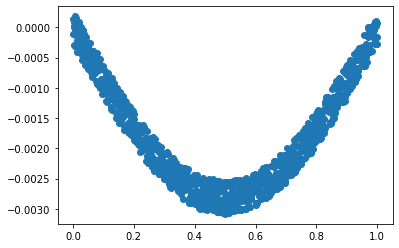

In [17]:
#plot the 1st entry of the dataframe
plt.scatter(fake_dataframe['x'][1],fake_dataframe['y'][1],label=str(fake_dataframe.index[1]))
plt.show()

In [20]:
#with the dataset organized is much easier to split the data.
#https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
#let's take a look at an example 
test_split=0.1 #we will use 10% of the data for testing. 
df = fake_dataframe
train_dataset, test_dataset = train_test_split(df, test_size = test_split)

In [21]:
#the training data will be spllited automatically by 80/20 during training using keras framework. 
# no need to split at this stage.
#let's check the array shapes: 
print('Training set: ',train.shape)
print('Test set: ',test.shape)

Training set:  (72, 6)
Test set:  (9, 6)


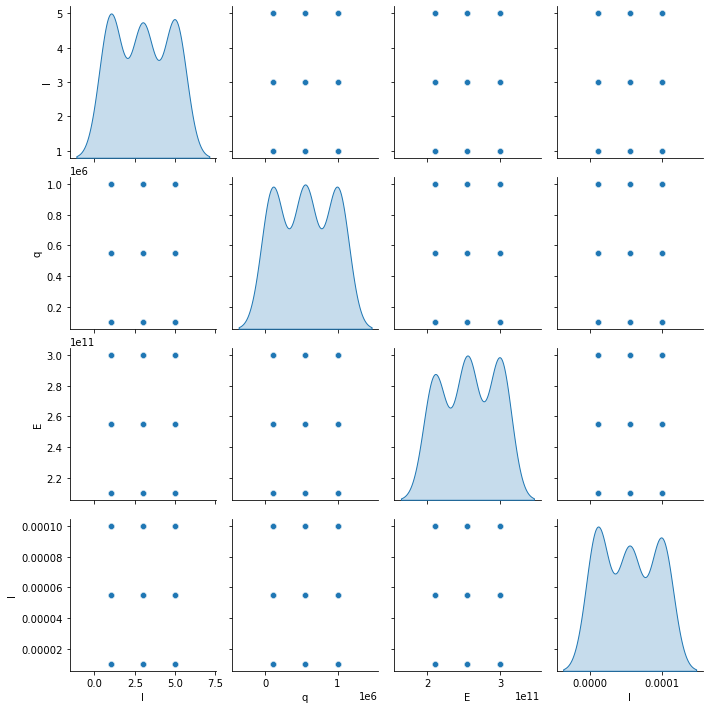

In [22]:
#inspect the training dataset
sns.pairplot(train_dataset[['l', 'q', 'E', 'I']], diag_kind='kde')

In [23]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
l,72.0,2.972222e+00,1.661259e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00
q,72.0,5.500000e+05,3.700019e+05,1.000000e+05,1.000000e+05,5.500000e+05,1.000000e+06,1.000000e+06
E,72.0,2.568750e+11,3.656402e+10,2.100000e+11,2.100000e+11,2.550000e+11,3.000000e+11,3.000000e+11
I,72.0,5.375000e-05,3.774218e-05,1.000000e-05,1.000000e-05,5.500000e-05,1.000000e-04,1.000000e-04


In [24]:
#follow this tutorial for our data 
# https://www.tensorflow.org/tutorials/keras/regression
#whenever possible, add comments and discussion

In [ ]:
#get the max "y" for each entry
fake_dataframe.y.apply(max)
#at this point we could plot very interesting stuff such as ymax distributions on the vars (q,l,E,I)..
# but let's think about that later

In [188]:
# Split the data
test_split = 0.1

n_test = int(0.1 * per_list.shape[0])  # number of l_q_E_I combinations for testing

x_mat_test = np.zeros([n, n_test])
x_mat_test = x_mat[:, (per_list.shape[0] - n_test):(per_list.shape[0])]

x_mat_train = np.delete(x_mat, np.s_[(per_list.shape[0] - n_test):(per_list.shape[0])], 1)

y_mat_test = np.zeros([n, n_test])
y_mat_test = y_mat[:, (per_list.shape[0] - n_test):(per_list.shape[0])]

y_mat_train = np.delete(y_mat, np.s_[(per_list.shape[0] - n_test):(per_list.shape[0])], 1)

In [ ]:
print(x_mat_train.shape)
print(x_mat_test.shape)

In [ ]:
print(y_mat_train.shape)
print(y_mat_test.shape)

In [ ]:
np.save('81_x_vectors', x_mat)
np.save('81_y_vectors', y_mat)

np.save('x_mat_train', x_mat_train)
np.save('y_mat_train', y_mat_train)

np.save('x_mat_test', x_mat_test)
np.save('y_mat_test', y_mat_test)

In [ ]:
# Maybe a better way to have the data
# Arranging the points in 3 dimensional np.arrays with shape [number_of_points_per_combination, number_of_x_y_combinations, 2]
xy_points_train = np.zeros([x_mat_train.shape[0], x_mat_train.shape[1],2])
for i in range(x_mat_train.shape[1]):
    for j in range(x_mat_train.shape[0]):
        xy_points_train[j, i, :] = [x_mat_train[j, i], y_mat_train[j, i]]
        
xy_points_test = np.zeros([x_mat_test.shape[0], x_mat_test.shape[1],2])
for i in range(x_mat_test.shape[1]):
    for j in range(x_mat_test.shape[0]):
        xy_points_test[j, i, :] = [x_mat_test[j, i], y_mat_test[j, i]]

In [ ]:
print(xy_points_test[:,0,:])
print('\n')
print(xy_points_test[:,7,:])

In [ ]:
np.save('xy_points_train', xy_points_train)

np.save('xy_points_test', xy_points_test)